## Initialize Notebook

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1.7 * matplotlib.rcParams['savefig.dpi']
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import metrics, cross_validation, tree, ensemble, linear_model, neighbors, grid_search

## Load Activity Data

In [2]:
names = ["hb_start", "hb_mid", "hb_end", "temp_wrist", "accel_wrist_1", "accel_wrist_2", "accel_wrist_3", \
         "gyro_wrist_1", "gyro_wrist_2", "gyro_wrist_3", "temp_chest", "accel_chest_1", "accel_chest_2", "accel_chest_3", \
         "gyro_chest_1", "gyro_chest_2", "gyro_chest_3", "temp_ankle", "accel_ankle_1", "accel_ankle_2", "accel_ankle_3", \
         "gyro_ankle_1", "gyro_ankle_2", "gyro_ankle_3", "act_id"]
df_act = pd.read_csv('all_data.csv', names=names)
X_train = np.array(df_act[["hb_start", "hb_mid", "hb_end", "temp_wrist", "accel_wrist_1", "accel_wrist_2", "accel_wrist_3", \
         "gyro_wrist_1", "gyro_wrist_2", "gyro_wrist_3", "temp_chest", "accel_chest_1", "accel_chest_2", "accel_chest_3", \
         "gyro_chest_1", "gyro_chest_2", "gyro_chest_3", "temp_ankle", "accel_ankle_1", "accel_ankle_2", "accel_ankle_3", \
         "gyro_ankle_1", "gyro_ankle_2", "gyro_ankle_3"]])
y_train = np.array(df_act['act_id'])
# df_act.head()

## Create/Analyze Classifiers

In [3]:
def compute_error(clf, X, y):
    cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
    return cross_validation.cross_val_score(clf, X, y, cv=cv, scoring='accuracy').mean()

In [4]:
est_tmp = ensemble.RandomForestClassifier(n_jobs=4, n_estimators=20, oob_score='True', random_state=42)
compute_error(est_tmp,X_train,y_train)

0.75714285714285712

In [5]:
tuning_parameters = {'n_estimators': range(1,105,5)}
cv = cross_validation.ShuffleSplit(len(y_train), n_iter=20, test_size=0.2, random_state=42)
est = grid_search.GridSearchCV(ensemble.RandomForestClassifier(n_jobs=4), tuning_parameters, cv=cv, scoring='accuracy')
est.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(102, n_iter=20, test_size=0.2, random_state=42),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

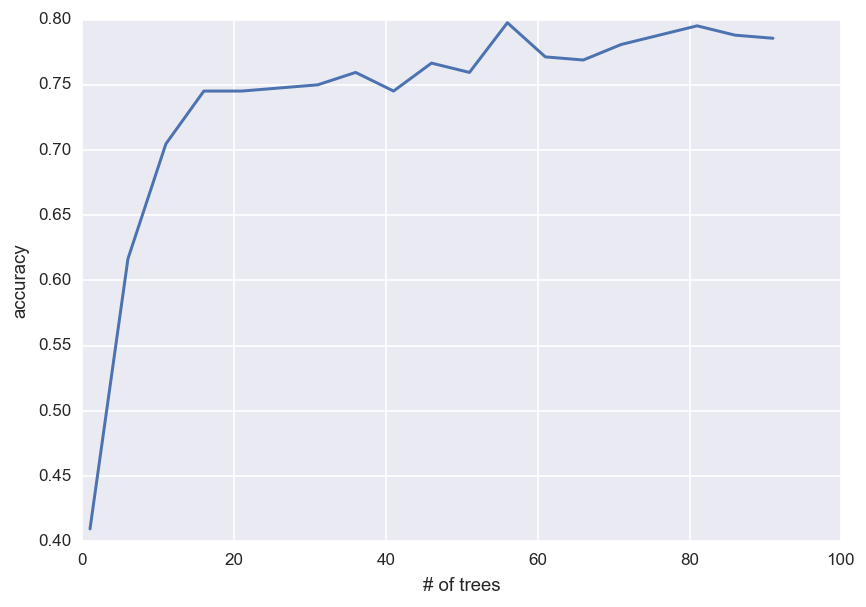

In [6]:
n_est = range(1,96,5)
g_score = []
for ii in range(len(n_est)):
    g_score.append(est.grid_scores_[ii][1])
    
plt.plot(n_est,g_score)
plt.xlabel('# of trees')
plt.ylabel('accuracy')

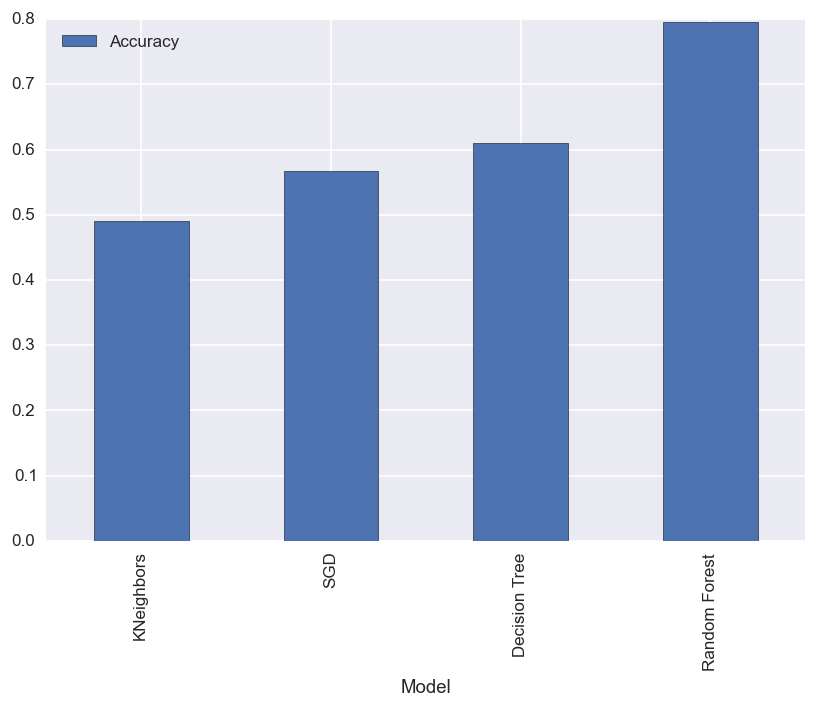

In [7]:
sgd_clf = linear_model.SGDClassifier(n_jobs=4, n_iter=5000, penalty='elasticnet', random_state=42)
neighbors_clf = neighbors.KNeighborsClassifier(n_neighbors=4)
tree_clf = tree.DecisionTreeClassifier()
forest_clf = ensemble.RandomForestClassifier(n_jobs=4, n_estimators=200, oob_score='True', random_state=42)
pd.DataFrame([
    ("KNeighbors", compute_error(neighbors_clf, X_train, y_train)),
    ("SGD", compute_error(sgd_clf, X_train, y_train)),
    ("Decision Tree", compute_error(tree_clf, X_train, y_train)),
    ("Random Forest", compute_error(forest_clf, X_train, y_train))
], columns=["Model", "Accuracy"]).plot(x="Model", y="Accuracy", kind="Bar")

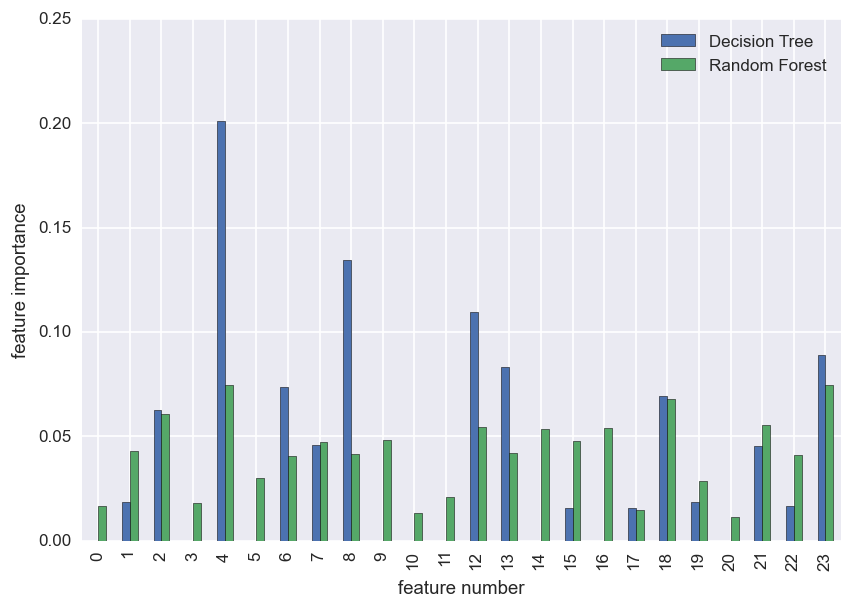

In [8]:
pd.DataFrame([
    tree_clf.fit(X_train, y_train).feature_importances_,
    forest_clf.fit(X_train, y_train).feature_importances_
], index=["Decision Tree", "Random Forest"]).T.plot(kind="bar").legend(loc="upper right")
plt.xlabel('feature number')
plt.ylabel('feature importance')